# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [63]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

In [70]:
a = [1,2,3,4,5]
newa = []
for i in range(len(a))[:-1]:
    newa.append((a[i]+a[i+1])/2)
newa

[1.5, 2.5, 3.5, 4.5]

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [73]:
data = pd.read_csv('weight-height.csv')
male_df = data[data["Gender"] == "Male"]
female_df = data[data["Gender"] == "Female"]

print('Male Height mean:', male_df['Height'].mean())
print('Male Height sd:', male_df['Height'].std())
print('Male Weight mean:', male_df['Weight'].mean())
print('Male Weight sd:', male_df['Weight'].std())
print('Female Height mean:', female_df['Height'].mean())
print('Female Height sd:', female_df['Height'].std())
print('Female Weight mean:', female_df['Weight'].mean())
print('Female Weight sd:', female_df['Weight'].std())


# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

(array([0.00177764, 0.00826081, 0.03272954, 0.08919584, 0.13865614,
        0.1323821 , 0.0819807 , 0.03042906, 0.00679687, 0.0006274 ]),
 array([54.26313333, 56.17577858, 58.08842383, 60.00106909, 61.91371434,
        63.8263596 , 65.73900485, 67.6516501 , 69.56429536, 71.47694061,
        73.38958587]),
 <a list of 10 Patch objects>)

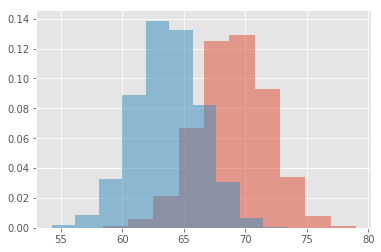

In [75]:
figure = plt.figure()
ax = figure.add_subplot(111)
ax.hist(male_df['Height'], bins=10, alpha=0.5, label="Male Height", density=True)
ax.hist(female_df['Height'], bins=10, alpha=0.5, label="Female Height", density=True)

In [ ]:
# Record your observations - are these inline with your personal observations?
# Histograms are consistent with expectations. Heights are normally shaped and male heights 
# are distributed around a higher mean than the female ones.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

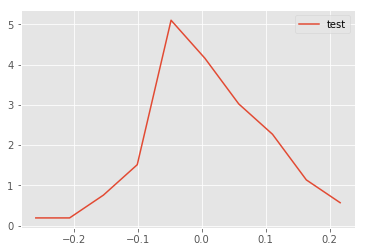

In [81]:
def density(s):
    
    y,x = np.histogram(s,density=True)
    newx = []
    
    for i in range(len(x))[:-1]:
        newx.append((x[i]+x[i+1])/2)
    
    return newx,y


#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

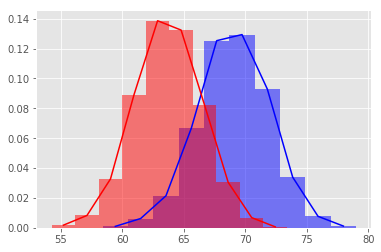

In [85]:
# You code here 
mx,my = density(male_df["Height"])
fx,fy = density(female_df["Height"])

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(mx,my,color='b')
ax.plot(fx,fy,color='r')
ax.hist(male_df['Height'], bins=10, alpha=0.5, label="Male Height", density=True, color='b')
ax.hist(female_df['Height'], bins=10, alpha=0.5, label="Female Height", density=True, color='r')
plt.show()


#### Repeat above exerice for male and female weights

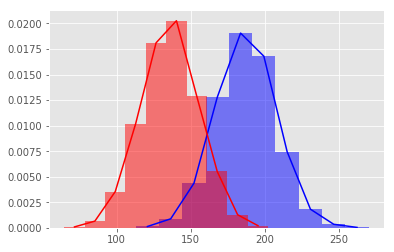

In [86]:
# Your code here 
mx,my = density(male_df["Weight"])
fx,fy = density(female_df["Weight"])

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(mx,my,color='b')
ax.plot(fx,fy,color='r')
ax.hist(male_df['Weight'], bins=10, alpha=0.5, label="Male Weight", density=True, color='b')
ax.hist(female_df['Weight'], bins=10, alpha=0.5, label="Female Weight", density=True, color='r')
plt.show()

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
# Weight distributions are also consistent with expectations. Both are normally distributed and
# the male distribution is centered around a higher mean than the female weight distribution.

# So whats the takeaway when comparing male and female heights and weights
# Males on average are taller and heavier than females.  Both sets of distributions have very
# similar spreads.  



#### Repeat Above experiments in seaborn and compare with your results. 

/Users/johnnguyen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


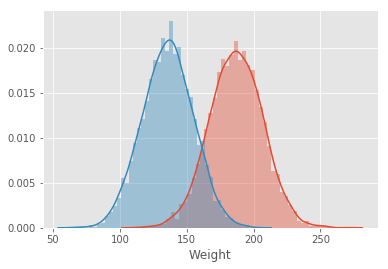

In [89]:
import seaborn as sb

sb.distplot(male_df["Weight"])
sb.distplot(female_df['Weight'])

In [90]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# Distplot seems to provide histograms and density plots executed in the same manner as
# the ones above.  The bin sizes in the seaborn histograms are much larger than the ones
# used above, giving a picture with good resolution.  The density plot executions differed a
# bit.  The original curves used histogram values to plot each individual point where the
# seaborn plot used another type of approximation.  

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.